In [46]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.decomposition import FactorAnalysis
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

In [2]:


#BH_100 = gpd.read_file(f'Belo_Horizonte_100_results_m.geojson')
#BH_200 = gpd.read_file(f'Belo_Horizonte_index_200_m.geojson')

BH_100 = pd.read_excel(f'BH_100.xlsx')
BH_200 = pd.read_excel(f'BH_200.xlsx')

In [48]:
all_metrics_columns = ['metric_1','metric_2','metric_3','metric_4','metric_5','metric_6','metric_7','metric_8','metric_9','metric_10']
all_original_metrics_columns = ['metric_1','metric_2_original','metric_3_original','metric_4','metric_5_original','metric_6_original','metric_7_original','metric_8','metric_9','metric_10_original']
not_inverted_metrics = ['metric_2','metric_6','metric_7','metric_8']
metrics_to_invert = [col for col in all_metrics_columns if col not in not_inverted_metrics]

In [49]:
# This has been done because the results were presented inverted. 
# NEEDS TO BE CHANGED FOR FUTURE ANALYSES
BH_100[metrics_to_invert] = -1.*BH_100[metrics_to_invert]

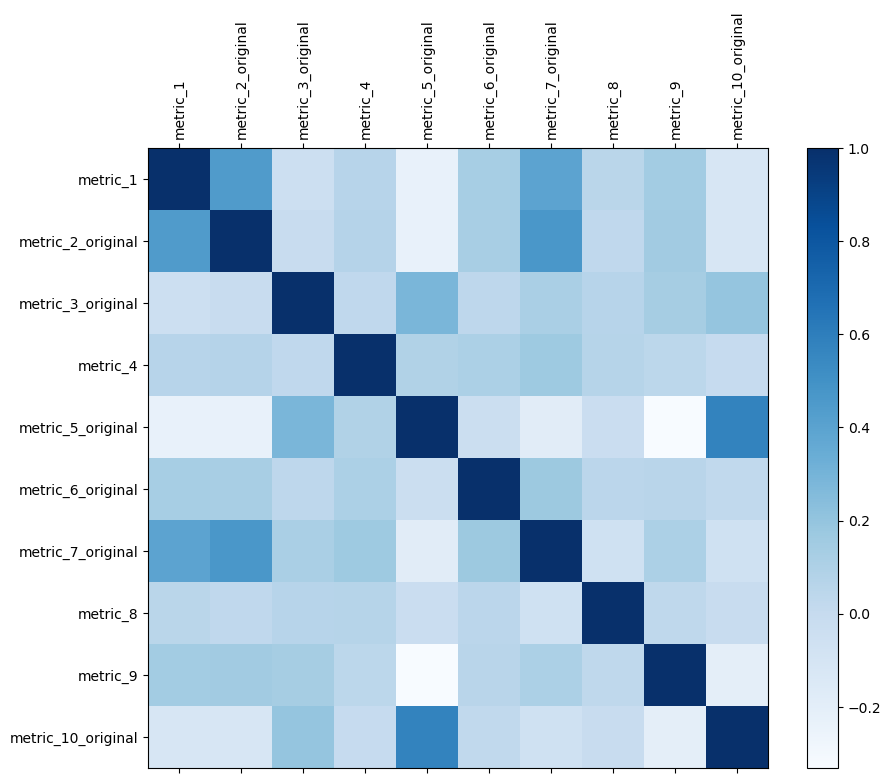

In [15]:
# Assuming BH_100 is your DataFrame, and all_original_metrics_columns contains the columns of interest
corr_matrix = BH_100.loc[:, all_original_metrics_columns].corr()

# Create the plot
plt.figure(figsize=(10, 8))

# Using a diverging colormap, such as `seismic`, `coolwarm`, or `PuBu_r`
# These will highlight 0 clearly while using one hue (for example, blue)
cax = plt.matshow(corr_matrix, cmap='Blues', fignum=1)  # Use any diverging colormap of your choice


# Add colorbar (legend)
plt.colorbar(cax)

# Add column and row names
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90);  # Rotate x-axis labels
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns);

# Display the plot
plt.show()


In [12]:
BH_100.loc[:, all_original_metrics_columns].corr()

,metric_1,metric_2_original,metric_3_original,metric_4,metric_5_original,metric_6_original,metric_7_original,metric_8,metric_9,metric_10_original
metric_1,1.000000,0.439488,-0.041248,0.062311,-0.229628,0.129902,0.395236,0.051276,0.143322,-0.115238
metric_2_original,0.439488,1.000000,-0.015225,0.071110,-0.231071,0.125830,0.468392,0.022715,0.152030,-0.116917
metric_3_original,-0.041248,-0.015225,1.000000,0.022785,0.285847,0.034788,0.119160,0.063420,0.131502,0.195249
metric_4,0.062311,0.071110,0.022785,1.000000,0.085852,0.109086,0.166499,0.068198,0.041672,0.000702
metric_5_original,-0.229628,-0.231071,0.285847,0.085852,1.000000,-0.037635,-0.183426,-0.028247,-0.331695,0.572488
metric_6_original,0.129902,0.125830,0.034788,0.109086,-0.037635,1.000000,0.172750,0.044755,0.053762,0.021137
metric_7_original,0.395236,0.468392,0.119160,0.166499,-0.183426,0.172750,1.000000,-0.065296,0.106267,-0.064674
metric_8,0.051276,0.022715,0.063420,0.068198,-0.028247,0.044755,-0.065296,1.000000,0.029632,-0.012478
metric_9,0.143322,0.152030,0.131502,0.041672,-0.331695,0.053762,0.106267,0.029632,1.000000,-0.202197
metric_10_original,-0.115238,-0.116917,0.195249,0.000702,0.572488,0.021137,-0.064674,-0.012478,-0.202197,1.000000


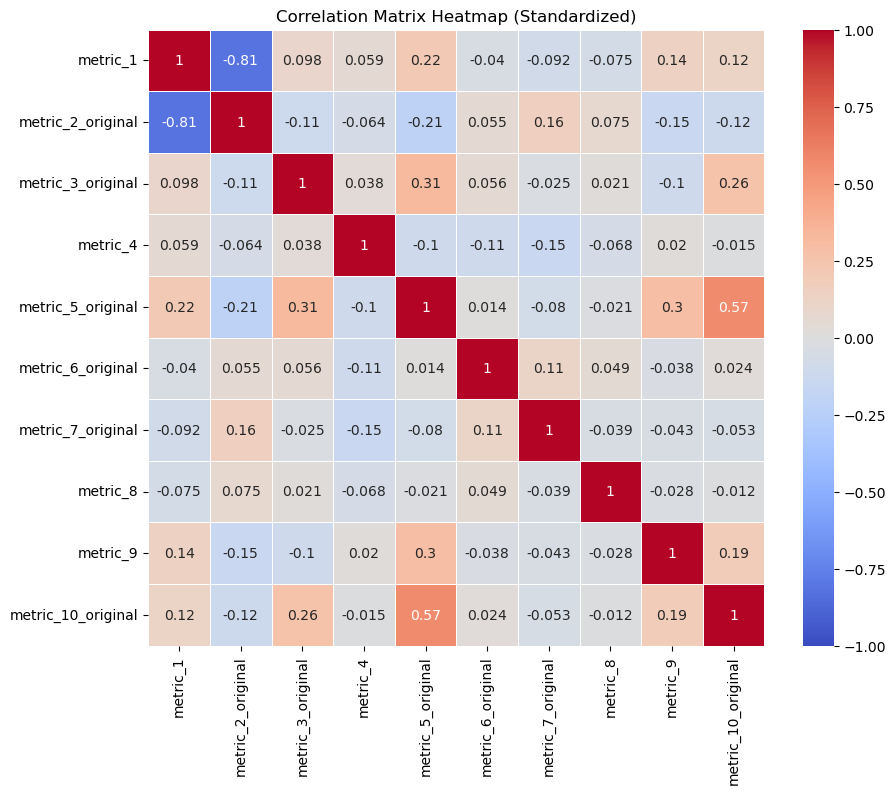

In [60]:
features = all_original_metrics_columns
x = BH_100.dropna(how='any').loc[:, features].values
#y = BH_100.loc[:,['target']].values
x = StandardScaler().fit_transform(x)

standardized_df = pd.DataFrame(x, columns=features)

# Compute the correlation matrix
corr_matrix = standardized_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.title('Correlation Matrix Heatmap (Standardized)')
plt.show()

In [52]:

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, BH_100['irregularity_index']], axis = 1)

In [53]:
principalDf

,principal component 1,principal component 2
0,2.896847,2.349436
1,-0.041496,5.124382
2,1.844804,0.465411
3,-0.254587,2.873440
4,-0.426614,3.510272
...,...,...
28751,1.663553,0.021160
28752,-2.728148,1.737627
28753,1.485262,0.399005
28754,1.952659,0.353105


In [54]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=features)

# Display the loadings
print(loadings)

                         PC1       PC2
metric_1           -0.487255 -0.393260
metric_2_original   0.494205  0.403662
metric_3_original  -0.247507  0.304394
metric_4           -0.042022 -0.297162
metric_5_original  -0.456423  0.416027
metric_6_original   0.040904  0.255174
metric_7_original   0.157603  0.194743
metric_8            0.068248  0.147075
metric_9           -0.259558  0.067903
metric_10_original -0.385300  0.446187


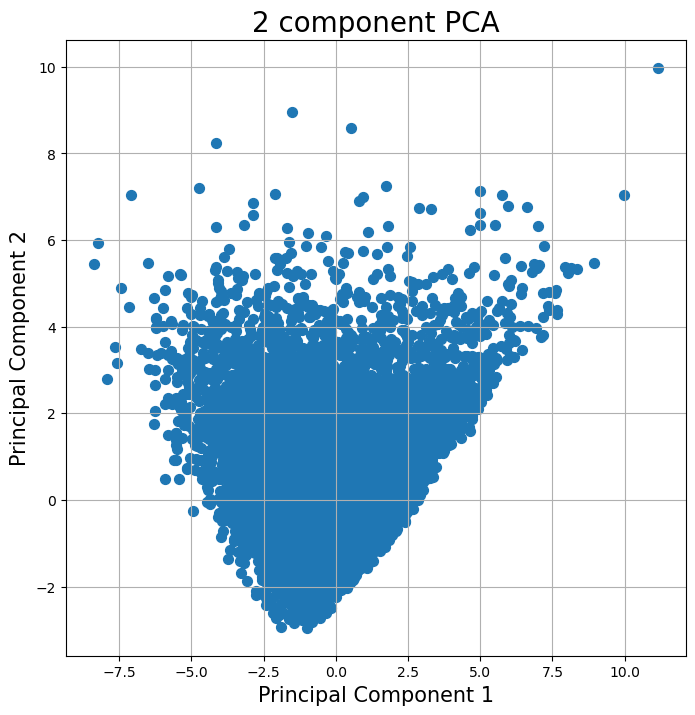

In [55]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

ax.scatter(finalDf.loc[:, 'principal component 1'], 
           finalDf.loc[:, 'principal component 2'],
           s = 50)

ax.grid()

In [34]:
pca.explained_variance_ratio_

array([0.22986479, 0.15116537])

In [57]:
BH_100[features].describe()

,metric_1,metric_2_original,metric_3_original,metric_4,metric_5_original,metric_6_original,metric_7_original,metric_8,metric_9,metric_10_original
count,65731.000000,65731.000000,60498.000000,32277.000000,35705.000000,5.223700e+04,88107.000000,62481.000000,33398.000000,32277.000000
mean,-0.608116,33.056886,68.272481,-0.736623,160.021990,4.678477e+00,346.188714,0.018397,-0.537801,4.666800
std,0.261119,69.920422,59.350767,0.401586,126.514308,8.195432e+00,392.322731,0.082256,0.223989,7.620228
min,-1.000000,0.000000,0.904426,-1.000000,0.000000,4.261921e-09,12.118286,0.000000,-0.999945,0.000000
25%,-0.818182,11.334100,36.573069,-1.000000,99.945456,1.287113e+00,47.984815,0.000000,-0.708180,0.000000
50%,-0.565217,14.472209,53.460098,-1.000000,99.951216,2.851723e+00,148.240595,0.001510,-0.542703,0.478463
75%,-0.428571,23.207886,77.388866,-0.500000,199.897748,5.244246e+00,573.408314,0.007976,-0.376794,6.676769
max,-0.000000,1883.135809,736.659449,-0.000000,1799.010115,8.967727e+01,1572.430695,1.000000,-0.000000,44.771762


In [58]:
len(BH_100[features].dropna(how='any'))



28756

In [61]:
kmeans = KMeans(n_clusters=3)  # You can experiment with the number of clusters
kmeans.fit(x)  # 'x' being the scaled version of your metrics
labels = kmeans.labels_

In [38]:
labels

array([2, 1, 2, ..., 2, 2, 2], dtype=int32)

**Factor analysis**

In [62]:
# Factor analysis
fa = FactorAnalysis(n_components=2)
components = fa.fit_transform(x)

In [42]:

rf = RandomForestRegressor()
rf.fit(x, labels)
feature_importance = rf.feature_importances_
